# Similarity of Displacements in embeddings

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import normalize
from gensim.models import KeyedVectors
import matplotlib.pyplot as plt
%matplotlib inline

## Helper Functions

Source: "How to make a racist AI without really trying"

In [2]:
def load_embeddings(filename):
    
    labels = []
    rows = []
    with open(filename, encoding='utf-8') as infile:
        
        # Get the file
        for i, line in enumerate(infile):
            if i % 100000 == 0:
                print(i)
            items = line.rstrip().split(' ')
            if len(items) == 2:
                continue
            labels.append(items[0])
            
            values = np.array([float(x) for x in items[1:]], 'f')
            
            # Normalize the values for geometry calculations
            values = normalize(values.reshape(1, -1))
            
            rows.append(values)
        
        arr = np.vstack(rows)
        return pd.DataFrame(arr, index=labels, dtype='f')

## Data In

In [3]:
# Get the Glove and word2vec embeddings
glove = load_embeddings('data/glove.6B.100d.txt')
word2vec = KeyedVectors.load_word2vec_format('data/word2vec-google-news-300/word2vec-google-news-300.gz', limit=600000, binary=True)

0
100000
200000
300000


## Analysis

In [35]:
# Get our two endpoints for our hispanic-american axis in both embeddings
mexican_vector_glove = np.array(glove[glove.index == 'mexican'])
american_vector_glove = np.array(glove[glove.index == 'american'])

mexican_vector_word2vec = word2vec.get_vector('mexican')
american_vector_word2vec = word2vec.get_vector('american')

In [36]:
# Get directions in both embeddings
direction_glove = american_vector_glove - mexican_vector_glove
direction_word2vec = american_vector_word2vec - mexican_vector_word2vec

### Antonyms

In [37]:
# Antonyms words to check
antonyms = [('best','worst')
            ,('tasty','nasty')
            ,('clean','dirty')
            ,('employed','unemployed')
            ,('beautiful','ugly')
            ,('safe','dangerous')
            ,('capable','incapable')
            ,('early','late')
            ,('succeed','fail')
            ,('gentle','rough')
            ,('brave','cowardly')
            ,('intelligent','stupid')
            ,('superior','inferior')
            ,('diligent','lazy')
            ,('quiet','noisy')
            ,('pleasant','unpleasant')
            ,('pure','impure')
            ,('qualified','unqualified')
            ,('courteous','rude')
            ,('sober','drunk')
            ,('safe','unsafe')
            ,('useful','useless')
            ,('obedient','disobedient')
            ,('neat','messy')]

In [38]:
# Let's calculate the displacements of each antonym pair on the mexican-american axis
displacements_glove = list()
for antonym_pair in antonyms:
    
    positive_word = antonym_pair[0]
    negative_word = antonym_pair[1]
    
    positive_word_position = np.sum(np.array(glove[glove.index == positive_word]) * direction_glove)/np.linalg.norm(direction_glove)**2 
    negative_word_position = np.sum(np.array(glove[glove.index == negative_word]) * direction_glove)/np.linalg.norm(direction_glove)**2 
    
    displacements_glove.append(positive_word_position - negative_word_position)

displacements_word2vec = list()
for antonym_pair in antonyms:
    
    positive_word = antonym_pair[0]
    negative_word = antonym_pair[1]
    
    positive_word_position = np.sum(word2vec.get_vector(positive_word) * direction_word2vec)/np.linalg.norm(direction_word2vec)**2 
    negative_word_position = np.sum(word2vec.get_vector(negative_word) * direction_word2vec)/np.linalg.norm(direction_word2vec)**2 
    
    displacements_word2vec.append(positive_word_position - negative_word_position)

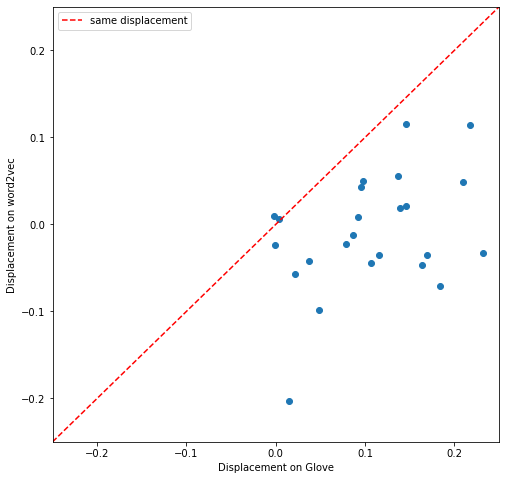

In [39]:
# Let's plot it
fig, ax = plt.subplots(figsize=(8,8))

ax.scatter(displacements_glove, displacements_word2vec)
ax.plot([-0.25,0.25], [-0.25,0.25], linestyle='--', color='red', label='same displacement')
_ = ax.set_xlim(-0.25, 0.25)
_ = ax.set_ylim(-0.25, 0.25)
_ = ax.set_xlabel('Displacement on Glove')
_ = ax.set_ylabel('Displacement on word2vec')
_ = ax.legend()

plt.savefig('img/similarity_of_displacements.jpg')